In [286]:
import sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier


data = pd.read_csv('data.csv')
#day of week, time, temperature, humidity, light on/off, aircon on/off, aircon temp, room, class
data.columns = ["day", "hour", "minute", "temperature", "humidity", "light_state", "aircon_state", "aircon_temp", "room", "class"]
data.head()

,day,hour,minute,temperature,humidity,light_state,aircon_state,aircon_temp,room,class
0,0,0,10,28.86,94.22,0,1,25,testRoom,wddh
1,0,0,20,32.30,80.88,0,1,27,testRoom,wddh
2,0,0,30,29.93,78.75,0,0,23,testRoom,wddc
3,0,0,40,32.09,83.99,1,1,27,testRoom,wdnh
4,0,0,50,28.24,95.64,0,1,29,testRoom,wddh


In [294]:
Y = data['class']
X = data.drop(["room","class"], axis=1)
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=100)

# KNN

In [309]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
x = [[6,9,50,21,23.68,0,0,24]]
prediction = knn.predict(X_test)
print(prediction)

['wddc' 'wddh' 'wddh' ... 'wddh' 'wedh' 'wddh']


# Decision Tree

[Text(0.5, 0.875, 'day <= 4.5\nentropy = 2.178\nsamples = 32255\nvalue = [5564, 15131, 667, 1677, 2182, 6086, 255, 693]\nclass = wddh'),
 Text(0.25, 0.625, 'aircon_state <= 0.5\nentropy = 1.317\nsamples = 23039\nvalue = [5564, 15131, 667, 1677, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.125, 0.375, 'light_state <= 0.5\nentropy = 0.491\nsamples = 6231\nvalue = [5564, 0, 667, 0, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 5564\nvalue = [5564, 0, 0, 0, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 667\nvalue = [0, 0, 667, 0, 0, 0, 0, 0]\nclass = wddc'),
 Text(0.375, 0.375, 'light_state <= 0.5\nentropy = 0.468\nsamples = 16808\nvalue = [0, 15131, 0, 1677, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 15131\nvalue = [0, 15131, 0, 0, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 1677\nvalue = [0, 0, 0, 1677, 0, 0, 0, 0]\nclass = wdnh'),
 Text(0.75, 0.625, 'aircon_state <= 0.5\n

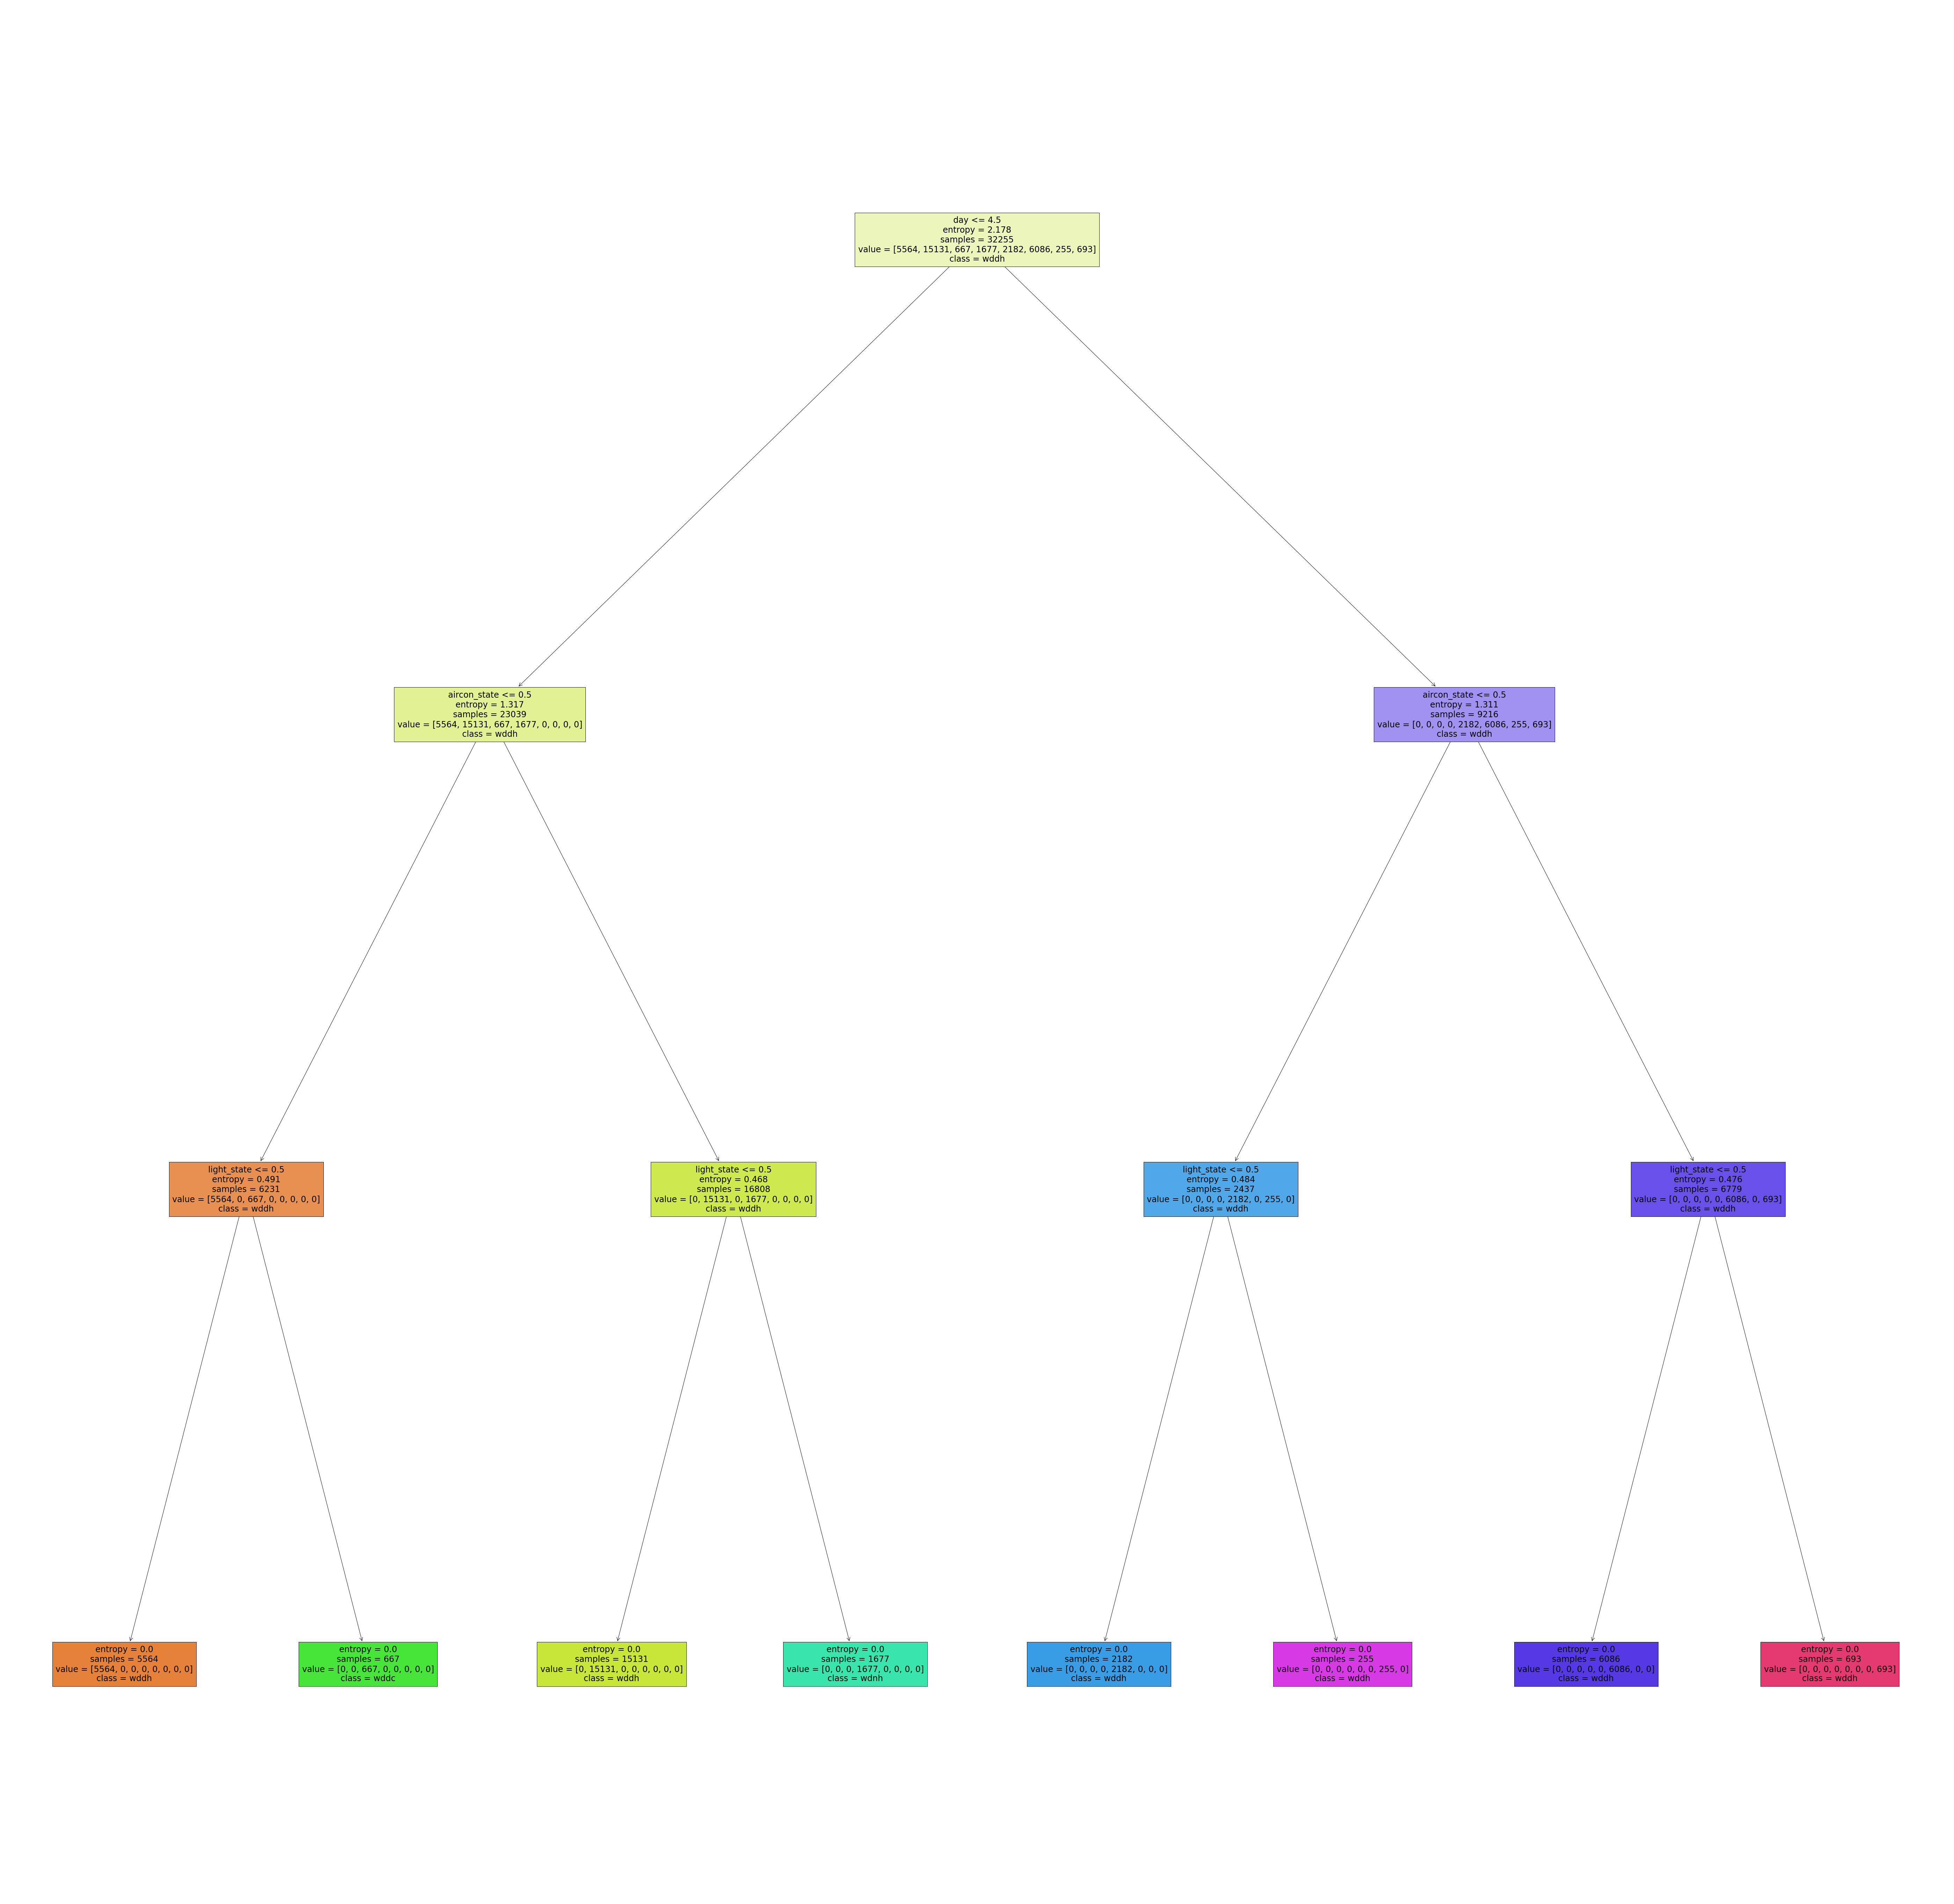

In [289]:
import matplotlib.pyplot as plt


clf = DecisionTreeClassifier(criterion='entropy',random_state = 100, max_depth=10, min_samples_leaf=100)
#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X_train,Y_train)
clf = clf.fit(X,Y)
fig = plt.figure(figsize=(100,100))
tree.plot_tree(clf,feature_names=X.columns,class_names=Y,filled=True, impurity=True)

[Text(0.5, 0.875, 'X[0] <= 4.5\nentropy = 2.178\nsamples = 32255\nvalue = [5564, 15131, 667, 1677, 2182, 6086, 255, 693]'),
 Text(0.25, 0.625, 'X[6] <= 0.5\nentropy = 1.317\nsamples = 23039\nvalue = [5564, 15131, 667, 1677, 0, 0, 0, 0]'),
 Text(0.125, 0.375, 'X[5] <= 0.5\nentropy = 0.491\nsamples = 6231\nvalue = [5564, 0, 667, 0, 0, 0, 0, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 5564\nvalue = [5564, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 667\nvalue = [0, 0, 667, 0, 0, 0, 0, 0]'),
 Text(0.375, 0.375, 'X[5] <= 0.5\nentropy = 0.468\nsamples = 16808\nvalue = [0, 15131, 0, 1677, 0, 0, 0, 0]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 15131\nvalue = [0, 15131, 0, 0, 0, 0, 0, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 1677\nvalue = [0, 0, 0, 1677, 0, 0, 0, 0]'),
 Text(0.75, 0.625, 'X[6] <= 0.5\nentropy = 1.311\nsamples = 9216\nvalue = [0, 0, 0, 0, 2182, 6086, 255, 693]'),
 Text(0.625, 0.375, 'X[5] <= 0.5\nentropy = 0.484\nsamples = 2

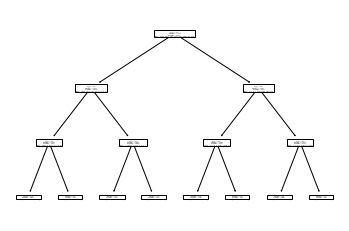

In [290]:
tree.plot_tree(clf)

# DBScan

       day  hour  minute  temperature  humidity  light_state  aircon_state  \
0        0     0      10        28.86     94.22            0             1   
1        0     0      20        32.30     80.88            0             1   
2        0     0      30        29.93     78.75            0             0   
3        0     0      40        32.09     83.99            1             1   
4        0     0      50        28.24     95.64            0             1   
...    ...   ...     ...          ...       ...          ...           ...   
32250    6    23      10        32.16     77.73            1             1   
32251    6    23      20        30.28     81.30            0             1   
32252    6    23      30        33.56     86.75            0             1   
32253    6    23      40        33.88     87.01            0             1   
32254    6    23      50        28.68     95.68            0             0   

       aircon_temp  class  
0               25      3  
1      

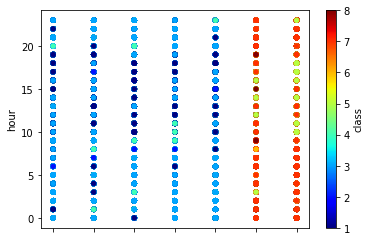

In [296]:
from sklearn.cluster import DBSCAN
Y.columns = ["class"]
#Y["class"].replace({"wddc": "1","wdnc": "2","wddh": "3","wdnh": "4","wedc": "5","wenc": "6","wedh": "7","wenh": "8",})
#print(Y)
db = DBSCAN(eps=15.5, min_samples=5).fit(X)
result = pd.concat((X,Y), axis=1)
result["class"].replace({"wddc": 1,"wdnc": 2,"wddh": 3,"wdnh": 4,"wedc": 5,"wenc": 6,"wedh": 7,"wenh": 8,},inplace= True)
print(result)
_ = result.plot.scatter(x='day',y='hour',c='class', colormap='jet')

# K-Means Clustering

In [297]:
from scipy.spatial import distance

#Compute distance between each pair of the two collections of inputs.
dis = distance.cdist(X, X, 'euclidean')
print(dis)

[[ 0.         17.14028004 25.40601897 ... 32.35569347 39.47384577
  46.57428475]
 [17.14028004  0.         11.27624938 ... 26.77768661 31.76591412
  41.317604  ]
 [25.40601897 11.27624938  0.         ... 25.36093255 28.03266131
  35.41450833]
 ...
 [32.35569347 26.77768661 25.36093255 ...  0.         11.6691902
  22.48464587]
 [39.47384577 31.76591412 28.03266131 ... 11.6691902   0.
  15.10658466]
 [46.57428475 41.317604   35.41450833 ... 22.48464587 15.10658466
   0.        ]]


In [307]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=8, random_state=100)
k_means.fit(X) 
labels = k_means.labels_
print('labels:', labels)
pd.DataFrame(labels, index=data["class"], columns=['class'])

labels: [5 2 2 ... 4 4 4]


,class
class,
wddh,5
wddh,2
wddc,2
wdnh,7
wddh,7
...,...
wenh,3
wedh,3
wedh,4


In [308]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=X.columns)

,day,hour,minute,temperature,humidity,light_state,aircon_state,aircon_temp
0,2.994989,13.813708,45.227273,33.225469,70.380648,0.107373,0.576056,26.023622
1,2.998926,13.856222,4.780662,33.329169,70.432174,0.103850,0.574038,26.020770
2,3.001848,4.344600,24.961711,30.452472,85.030702,0.099023,0.898865,25.982836
3,2.992965,21.349246,9.824121,30.628704,86.433553,0.102010,0.888945,26.039196
4,2.986574,21.318747,40.134262,30.602655,86.247176,0.094480,0.912979,25.980109
5,3.001866,4.313166,5.071962,30.432862,85.190706,0.093017,0.909382,25.998934
6,3.006897,14.156552,25.013793,33.242693,70.689586,0.103621,0.584655,26.000690
7,3.006414,4.346606,44.914484,30.453514,85.166579,0.105291,0.895243,25.965259


# Clean up

In [ ]:
data = data.drop(columns=["room"])
data.head()

,day,hour,minute,temperature,humidity,light_state,aircon_state,aircon_temp,class
0,0,0,10,33.81,83.21,0,1,27,wddh
1,0,0,20,27.32,85.62,0,1,27,wddh
2,0,0,30,31.08,91.14,0,1,28,wddh
3,0,0,40,33.91,88.28,0,1,24,wddh
4,0,0,50,27.62,94.32,0,1,25,wddh


In [ ]:
data['class'] = data['class'].astype('category')
data.describe(include='category')
print(data["class"].unique())

i= 0
for unique in data["class"].unique():
    i += 1
clusters = i
print(clusters)

['wddh', 'wddc', 'wdnh', 'wdnc', 'wedh', 'wenh', 'wedc', 'wenc']
Categories (8, object): ['wddc', 'wddh', 'wdnc', 'wdnh', 'wedc', 'wedh', 'wenc', 'wenh']
8


In [ ]:
clustering_kmeans = KMeans(n_clusters=clusters)
data = data.drop(columns=["class"])
data['clusters'] = clustering_kmeans.fit_predict(data)

data.head(25)

,day,hour,minute,temperature,humidity,light_state,aircon_state,aircon_temp,clusters
0,0,0,10,33.81,83.21,0,1,27,5
1,0,0,20,27.32,85.62,0,1,27,4
2,0,0,30,31.08,91.14,0,1,28,4
3,0,0,40,33.91,88.28,0,1,24,2
4,0,0,50,27.62,94.32,0,1,25,2
5,0,1,0,29.77,93.48,0,1,23,5
6,0,1,10,30.73,78.77,0,1,23,5
7,0,1,20,28.58,89.14,0,0,24,4
8,0,1,30,28.17,71.91,0,1,27,4
9,0,1,40,33.87,78.89,0,1,26,2


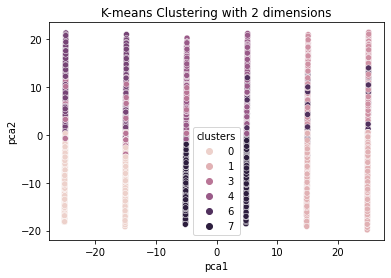

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
pca_num_components = 2
#data = data.drop(columns=["class"])
reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)

plt.title('K-means Clustering with 2 dimensions')
plt.show()

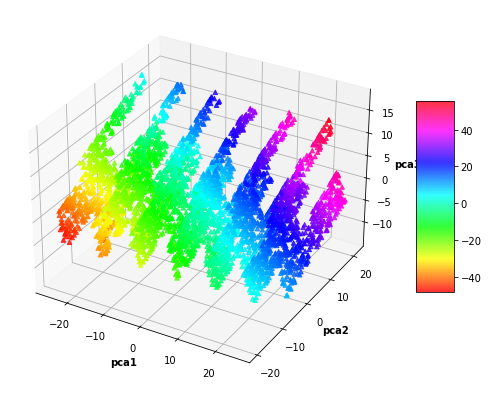

In [ ]:
pca_num_components = 3
#data = data.drop(columns=["class"])
threedreduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(threedreduced_data,columns=['pca1','pca2','pca3'])

# Creating color map
my_cmap = plt.get_cmap('hsv')
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
sctt = ax.scatter3D(results["pca1"], results["pca2"], results["pca3"],
                    alpha = 0.8,
                    c = (results["pca1"] + results["pca2"] + results["pca3"]),
                    cmap = my_cmap,
                    marker ='^')
ax.set_xlabel('pca1', fontweight ='bold')
ax.set_ylabel('pca2', fontweight ='bold')
ax.set_zlabel('pca3', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.show()

In [ ]:
from sklearn import tree

data = pd.read_csv('data.csv')
data.columns = ["day", "hour", "minute", "temperature", "humidity", "light_state", "aircon_state", "aircon_temp", "room", "class"]

Y = data['class']
X = data.drop(["room","class"], axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)
clf = clf.fit(X,Y)

[Text(0.5, 0.875, 'day <= 4.5\nentropy = 2.172\nsamples = 4031\nvalue = [698, 1928, 79, 174, 277, 726, 41, 108]\nclass = wddh'),
 Text(0.25, 0.625, 'aircon_state <= 0.5\nentropy = 1.27\nsamples = 2879\nvalue = [698, 1928, 79, 174, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.125, 0.375, 'light_state <= 0.5\nentropy = 0.474\nsamples = 777\nvalue = [698, 0, 79, 0, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 698\nvalue = [698, 0, 0, 0, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 79\nvalue = [0, 0, 79, 0, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.375, 0.375, 'light_state <= 0.5\nentropy = 0.412\nsamples = 2102\nvalue = [0, 1928, 0, 174, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 1928\nvalue = [0, 1928, 0, 0, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 174\nvalue = [0, 0, 0, 174, 0, 0, 0, 0]\nclass = wddh'),
 Text(0.75, 0.625, 'aircon_state <= 0.5\nentropy = 1.406\nsamples = 1

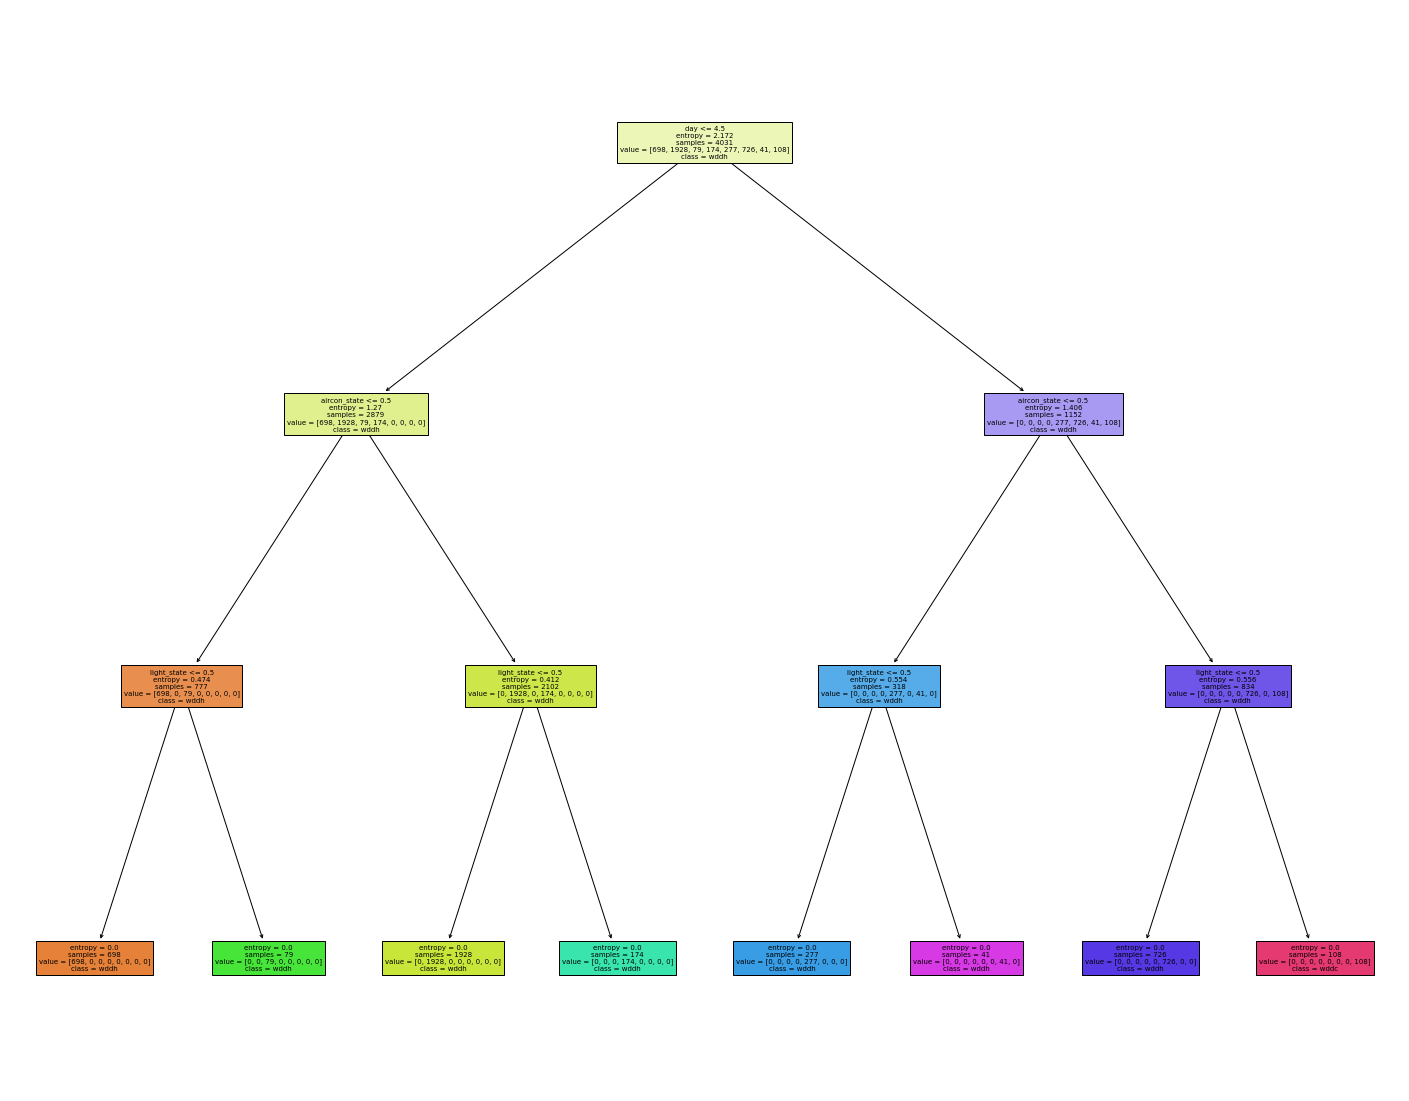

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,feature_names=X.columns,class_names=Y,filled=True, impurity=True)